In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


1. What is the distribution of age among heart failure patients in the dataset?

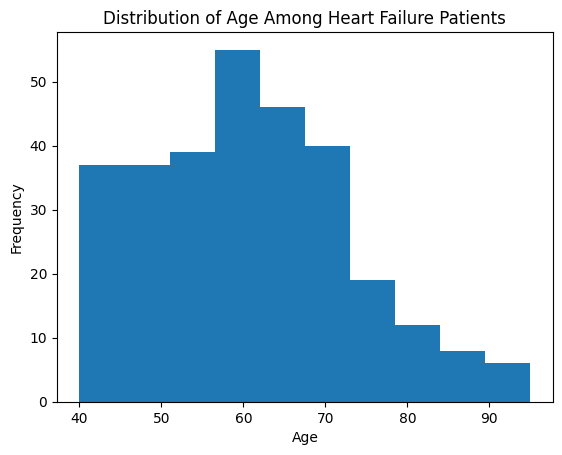

In [4]:
# Create a histogram of the 'age' column
plt.hist(df['age'])

# Set the title and labels of the plot
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()


2. How does the death rate vary with age?

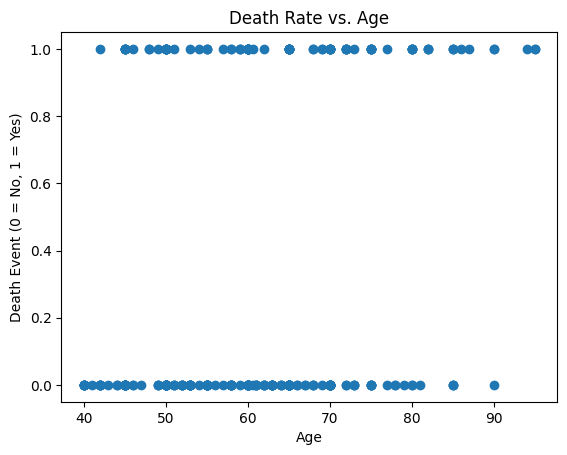

In [5]:
# Create a scatter plot of age vs. death event
plt.scatter(df['age'], df['DEATH_EVENT'])

# Set the title and labels of the plot
plt.title('Death Rate vs. Age')
plt.xlabel('Age')
plt.ylabel('Death Event (0 = No, 1 = Yes)')

# Display the plot
plt.show()


3. What is the percentage of male and female patients in the dataset?

In [6]:
# Calculate the percentage of male and female patients
male_percentage = (df['sex'].value_counts()[1] / df.shape[0]) * 100
female_percentage = (df['sex'].value_counts()[0] / df.shape[0]) * 100

# Print the percentages
print("Percentage of Male Patients:", male_percentage)
print("Percentage of Female Patients:", female_percentage)


Percentage of Male Patients: 64.88294314381271
Percentage of Female Patients: 35.11705685618729


4. How does the platelet count vary among different age groups?

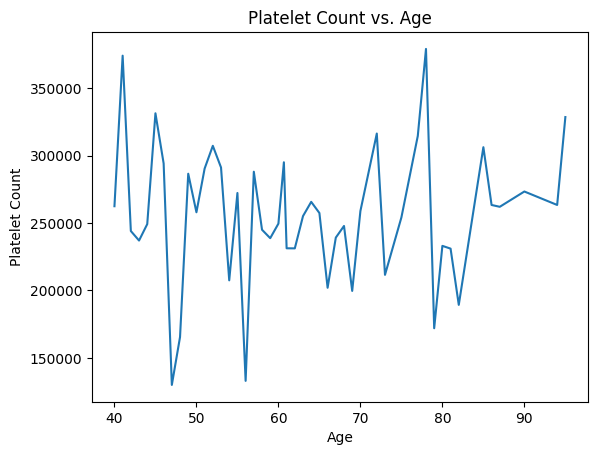

In [10]:
# Group the data by age and calculate the mean platelet count for each group
age_platelet_count = df.groupby('age')['platelets'].mean()

# Create a line chart of age vs. mean platelet count
plt.plot(age_platelet_count.index, age_platelet_count.values)

# Set the title and labels of the plot
plt.title('Platelet Count vs. Age')
plt.xlabel('Age')
plt.ylabel('Platelet Count')

# Display the plot
plt.show()


5. Is there a correlation between creatinine and sodium levels in the blood?

Correlation Coefficient: -0.1890952100911741


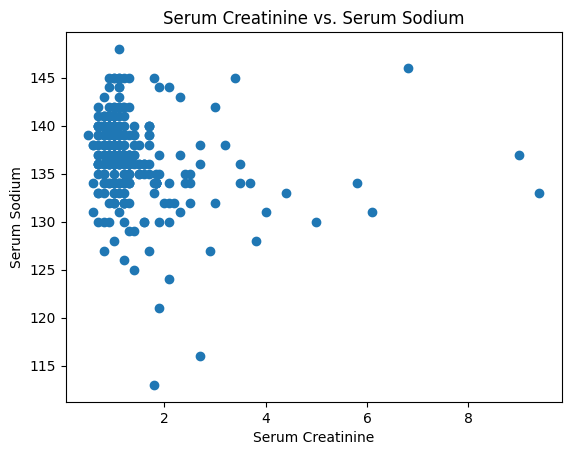

In [14]:
# Calculate the correlation coefficient between creatinine and sodium levels
correlation = df['serum_creatinine'].corr(df['serum_sodium'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)

# Create a scatter plot of creatinine vs. sodium levels
plt.scatter(df['serum_creatinine'], df['serum_sodium'])

# Set the title and labels of the plot
plt.title('Serum Creatinine vs. Serum Sodium')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')

# Display the plot
plt.show()


6. How does the prevalence of high blood pressure differ between male and female patients?

In [17]:
# Calculate the prevalence of high blood pressure for male and female patients
male_hypertension = (df[df['sex'] == 1]['high_blood_pressure'].value_counts()[1] / df[df['sex'] == 1].shape[0]) * 100
female_hypertension = (df[df['sex'] == 0]['high_blood_pressure'].value_counts()[1] / df[df['sex'] == 0].shape[0]) * 100

# Print the prevalence rates
print("Prevalence of High Blood Pressure in Male Patients:", male_hypertension)
print("Prevalence of High Blood Pressure in Female Patients:", female_hypertension)


Prevalence of High Blood Pressure in Male Patients: 31.443298969072163
Prevalence of High Blood Pressure in Female Patients: 41.904761904761905


7. What is the relationship between smoking habits and the occurrence of heart failure?

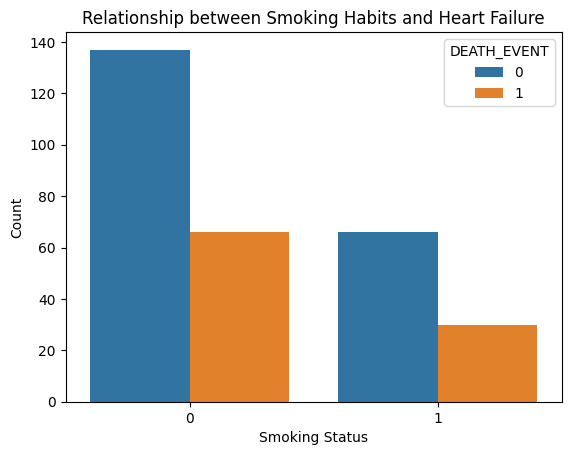

Proportion of Heart Failure Patients Who Smoke: 0.3125


In [19]:
# Create a bar chart of smoking status vs. death event
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)

# Set the title and labels of the plot
plt.title('Relationship between Smoking Habits and Heart Failure')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

# Display the plot
plt.show()

# Calculate the proportion of heart failure patients who smoke
smoking_proportion = df[df['DEATH_EVENT'] == 1]['smoking'].value_counts()[1] / df[df['DEATH_EVENT'] == 1].shape[0]

# Print the proportion
print("Proportion of Heart Failure Patients Who Smoke:", smoking_proportion)


8. Are there any noticeable patterns in the distribution of death events across different age groups?

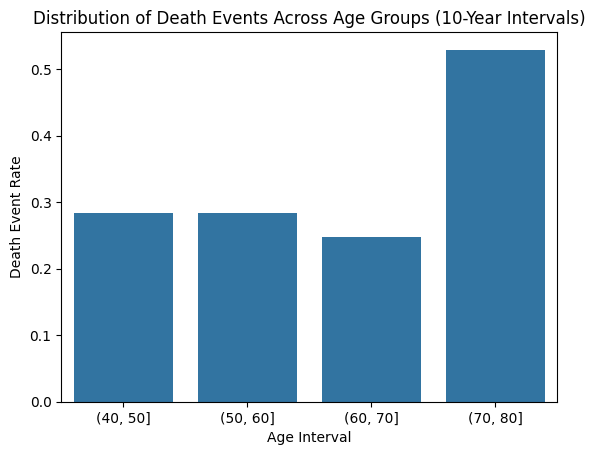

In [24]:
# Group the data by age intervals of 10 years and calculate the mean death event rate for each group
age_interval = pd.cut(df['age'], bins=np.arange(40, 90, 10))
age_interval_death_rate = df.groupby(age_interval)['DEATH_EVENT'].mean()

# Create a bar chart of age interval vs. death event rate
sns.barplot(x=age_interval_death_rate.index, y=age_interval_death_rate.values)

# Set the title and labels of the plot
plt.title('Distribution of Death Events Across Age Groups (10-Year Intervals)')
plt.xlabel('Age Interval')
plt.ylabel('Death Event Rate')

# Display the plot
plt.show()


9. Is there any significant difference in ejection fraction between patients with and without diabetes?

In [28]:
from scipy import stats

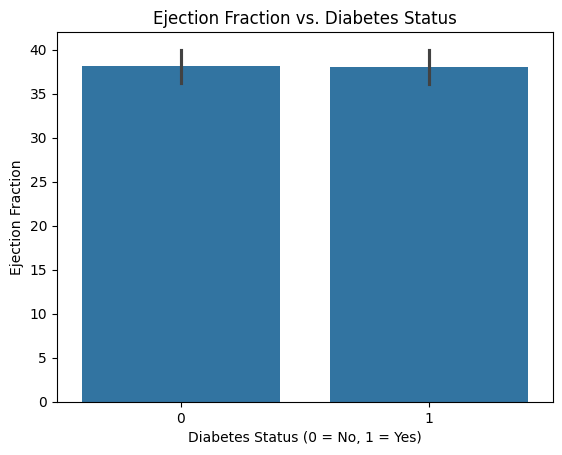

In [32]:
# Create a bar chart of diabetes status vs. ejection fraction
sns.barplot(x='diabetes', y='ejection_fraction', data=df)

# Set the title and labels of the plot
plt.title('Ejection Fraction vs. Diabetes Status')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('Ejection Fraction')

# Display the plot
plt.show()


10. How does the serum creatinine level vary between patients who survived and those who did not?

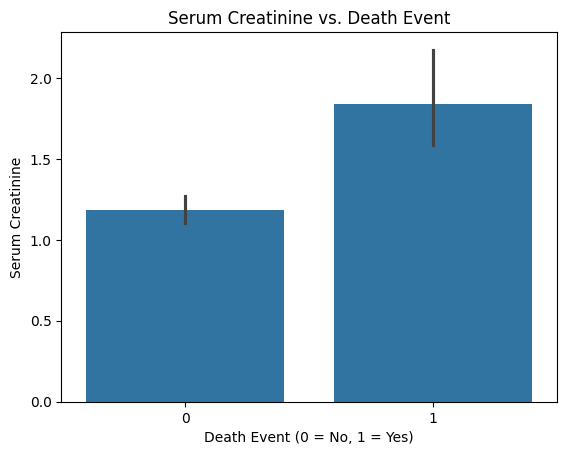

In [34]:
# prompt: draw the plot between average serum_creatinine and DEATH_EVENT

sns.barplot(x='DEATH_EVENT', y='serum_creatinine', data=df)

# Set the title and labels of the plot
plt.title('Serum Creatinine vs. Death Event')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Serum Creatinine')

# Display the plot
plt.show()
